1. Using a little bit of algebra, prove that (4.2) is equivalent to (4.3). In other words, the logistic function representation and logit represen- tation for the logistic regression model are equivalent.

[Q1.jpeg](Q1.jpeg)

2. It was stated in the text that classifying an observation to the class for which (4.12) is largest is equivalent to classifying an observation to the class for which (4.13) is largest. Prove that this is the case. In other words, under the assumption that the observations in the kth class are drawn from a N(μk,σ2) distribution, the Bayes’ classifier assigns an observation to the class for which the discriminant function is maximized.

[Q2.jpeg](Q2.jpeg)

3. This problem relates to the QDA model, in which the observations within each class are drawn from a normal distribution with a class- specific mean vector and a class specific covariance matrix. We con- sider the simple case where p = 1; i.e. there is only one feature.
Suppose that we have K classes, and that if an observation belongs to the kth class then X comes from a one-dimensional normal dis- tribution, X ∼ N(μk,σk2). Recall that the density function for the one-dimensional normal distribution is given in (4.11). Prove that in this case, the Bayes’ classifier is not linear. Argue that it is in fact quadratic.
Hint: For this problem, you should follow the arguments laid out in Section 4.4.2, but without making the assumption that σ12 = . . . = σK2 .

[Q3.jpeg](Q2.jpeg)

4. When the number of features p is large, there tends to be a deteri- oration in the performance of KNN and other local approaches that perform prediction using only observations that are near the test ob- servation for which a prediction must be made. This phenomenon is known as the curse of dimensionality, and it ties into the fact that non-parametric approaches often perform poorly when p is large. We will now investigate this curse.

(a) Suppose that we have a set of observations, each with measure- ments on p = 1 feature, X. We assume that X is uniformly (evenly) distributed on [0,1]. Associated with each observation is a response value. Suppose that we wish to predict a test obser- vation’s response using only observations that are within 10 % of the range of X closest to that test observation. For instance, in order to predict the response for a test observation with X = 0.6, we will use observations in the range [0.55,0.65]. On average, what fraction of the available observations will we use to make the prediction?

In [1]:
0.1

0.1

(b) Now suppose that we have a set of observations, each with measurements on p = 2 features, X1 and X2. We assume that (X1,X2) are uniformly distributed on [0,1]×[0,1]. We wish to predict a test observation’s response using only observations that are within 10 % of the range of X1 and within 10 % of the range of X2 closest to that test observation. For instance, in order to predict the response for a test observation with X1 = 0.6 and X2 = 0.35, we will use observations in the range [0.55, 0.65] for X1 and in the range [0.3, 0.4] for X2. On average, what fraction of the available observations will we use to make the prediction?

In [4]:
0.1 ** 2

0.010000000000000002

(c) Now suppose that we have a set of observations on p = 100 features. Again the observations are uniformly distributed on each feature, and again each feature ranges in value from 0 to 1. We wish to predict a test observation’s response using observations within the 10 % of each feature’s range that is closest to that test observation. What fraction of the available observations will we use to make the prediction?

In [6]:
0.1 ** 100

1.0000000000000056e-100

(d) Using your answers to parts (a)–(c), argue that a drawback of KNN when p is large is that there are very few training observations “near” any given test observation.

We can see this by plotting p against the proportion of observations falling within 10% of the range of the input space for some value of X.

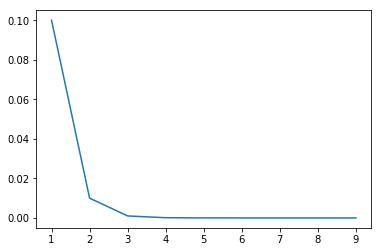

In [14]:
import numpy as np
import seaborn as sns

def num_obs_within(rnge, dim):
    return rnge ** dim

x = np.arange(1, 10)
y = num_obs_within(0.1, x)
sns.lineplot(x=x, y=y)

(e) Now suppose that we wish to make a prediction for a test observation by creating a p-dimensional hypercube centered around the test observation that contains, on average, 10 % of the training observations. For p = 1,2, and 100, what is the length of each side of the hypercube? Comment on your answer.

Note: A hypercube is a generalization of a cube to an arbitrary number of dimensions. When p = 1, a hypercube is simply a line segment, when p = 2 it is a square, and when p = 100 it is a 100-dimensional cube.

We calculate this by taking the p'th root of range. Inspecting the plot, we see that as p increases, the side length of the hypercube rapidly approaches the entire range of the feature space.

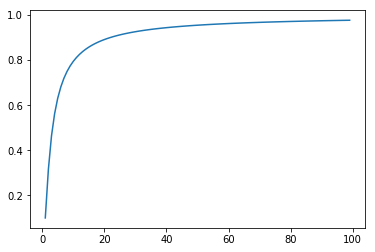

In [30]:
def cub_side(rnge, dim):
    return rnge ** (1/dim)

x = np.arange(1, 100)
y = cub_side(0.1, x)
sns.lineplot(x=x, y=y)

5. We now examine the differences between LDA and QDA.

(a) If the Bayes decision boundary is linear, do we expect LDA or QDA to perform better on the training set? On the test set?

- We expect QDA to perform better on the training set.
- We expect LDA to perform better on the test set.

Even though the Bayes decision boundary is linear, the training set is composed of observations drawn randomly from the population and is likely to exhibit some non-linearity due to chance (especially if n is small). As a more flexible classifier, QDA is able to capture more of this noise, improving its performance on the training set. On the test set, QDA will pay a price in variance which is not offset by a reduction in bias, reducing overall performace.


(b) If the Bayes decision boundary is non-linear, do we expect LDA or QDA to perform better on the training set? On the test set?

- We expect QDA to perform better on the training and test sets.

The Bayes decision boundry in non-linear, as a more flexible classifier QDA will capture this. The increase in variance of QDA will be offset by an even larger reduction in bias, improving overall performance.

(c) In general, as the sample size n increases, do we expect the test prediction accuracy of QDA relative to LDA to improve, decline, or be unchanged? Why?

- Increase

If the Bayes decision boundry is non-linear, QDA has lower bias than LDA but higher variance. Increasing n reduces the variance, reducing the overall prediction accuracy of QDA.


(d) True or False: Even if the Bayes decision boundary for a given problem is linear, we will probably achieve a superior test er- ror rate using QDA rather than LDA because QDA is flexible enough to model a linear decision boundary. Justify your answer.

- False

The best possible classifier is linear, we cannot do better using a non-linear classifier. Using QDA rather than LDA will increase variance without a corresponding decrease in bias resulting in poorer overall prediction accuracy on the test set.

6. Suppose we collect data for a group of students in a statistics class with variables X1 = hours studied, X2 = undergrad GPA, and Y = receive an A. We fit a logistic regression and produce estimated coefficient, βˆ0 = −6, βˆ1 = 0.05, βˆ2 = 1.

(a) Estimate the probability that a student who studies for 40 h and has an undergrad GPA of 3.5 gets an A in the class.

In [33]:
np.exp(-6 + 0.05 * 40 + 3.5) / (1 + np.exp(-6 + 0.05 * 40 + 3.5))

0.37754066879814546

(b) How many hours would the student in part (a) need to study to have a 50 % chance of getting an A in the class?

Substituting into log-odds: `log(p(x) / 1 - (p(x))) = β0 + β1x1 + βx2` we obtain x1 = 50.

- 50 hrs

7. Suppose that we wish to predict whether a given stock will issue a dividend this year (“Yes” or “No”) based on X, last year’s percent profit. We examine a large number of companies and discover that the mean value of X for companies that issued a dividend was X ̄ = 10, while the mean for those that didn’t was X ̄ = 0. In addition, the variance of X for these two sets of companies was σˆ2 = 36. Finally, 80 % of companies issued dividends. Assuming that X follows a normal distribution, predict the probability that a company will issue a dividend this year given that its percentage profit was X = 4 last year.

Hint: Recall that the density function for a normal random variable is f(x) = √ 1 e−(x−μ)2/2σ2 . You will need to use Bayes’ theorem.

plugging into [4.12] yields:

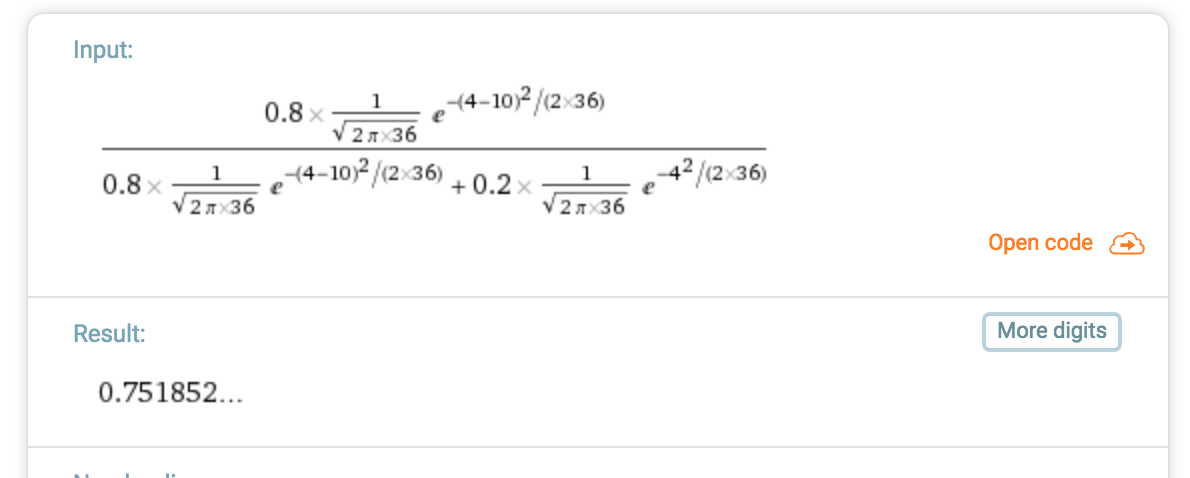

8. Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20 % on the training data and 30 % on the test data. Next we use 1-nearest neighbors (i.e. K = 1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

- In this case we prefer logistic regression.

1-nearest neighbours has 0% error on the training set, therefore the test error for 1-nearest neighbours in this case was 18 x 2 = 36%. This is higher than the 30% obtained by logistic regression on the test set.

9. This problem has to do with odds.


(a) On average, what fraction of people with an odds of 0.37 of defaulting on their credit card payment will in fact default?

0.37 / 1.36 = 0.27 = 27/100

(b) Suppose that an individual has a 16% chance of defaulting on her credit card payment. What are the odds that she will de- fault?

In [ ]:
0.16 / 1 - 0.16 = 0.19